60000 / 10000 images of size 28 X 28 clothes for train and test with labels

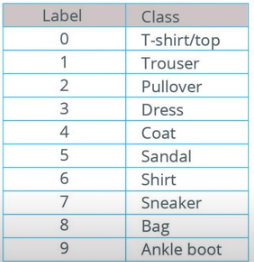

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
from tqdm import tqdm
import tensorflow as tf
from keras.layers import Dense,Flatten
from keras import Sequential
from keras.optimizers import Adam

Using TensorFlow backend.


In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype('float32')
x_train /= 255
x_test = x_test.astype('float32')
x_test /= 255
fmnist_train_ds = tf.data.Dataset.from_tensor_slices((x_train,y_train))
fmnist_train_ds = fmnist_train_ds.shuffle(5000).batch(32)

In [3]:
class_names = ['Tshirt/top','Trouser','Pullover','Dress','Coat','Sandel','Shirt','Sneaker','Bag','Ankle boot']

<BatchDataset shapes: ((None, 28, 28), (None,)), types: (tf.uint8, tf.uint8)>

In [4]:
num_train_examples = len(x_train)
num_test_examples = len(x_test)
print('train {}'.format(num_train_examples))
print('test {}'.format(num_test_examples))

train 60000
test 10000


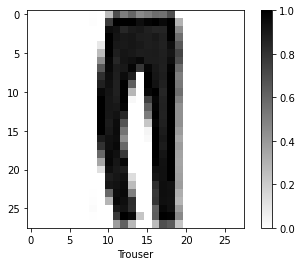

In [8]:
image,lablename = x_test[2],class_names[y_test[2]]
image = image.reshape((28,28))
plt.figure()
plt.imshow(image,cmap=plt.cm.binary)
plt.xlabel(lablename)
plt.colorbar()
plt.grid(False)
plt.show()

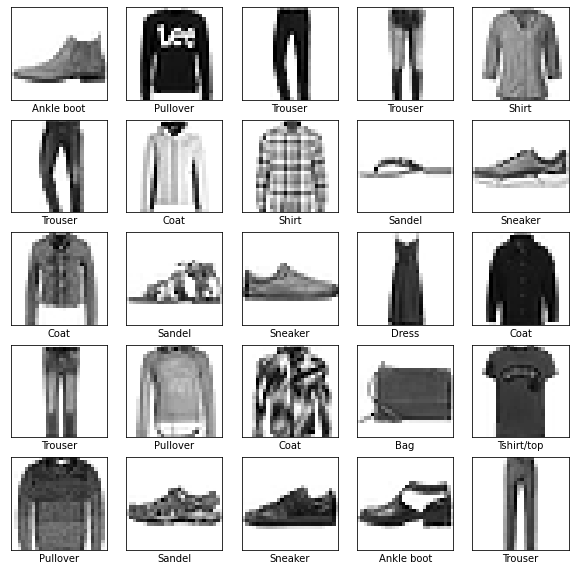

In [21]:
i=0
plt.figure(figsize=(10,10))
images,lables = x_test[:25,:-1],y_test[:25]

for idx,image in enumerate(images):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image,cmap=plt.cm.binary)
  plt.xlabel(class_names[lables[idx]])
  i += 1
plt.show()


In [4]:
model = Sequential([Flatten(input_shape=(28,28,)),
                    Dense(128,activation='relu'),
                    Dense(10,activation='softmax')])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [9]:
history = model.fit(x_train,y_train,epochs=5)
#history = model.fit(fmnist_train_ds,epochs=5)

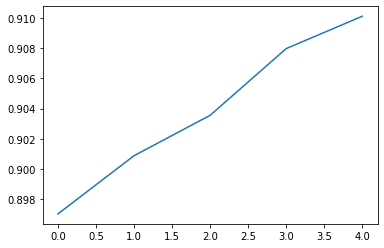

In [37]:
plt.plot(history.history['accuracy'])

In [39]:
test_loss, test_accuracy = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 71us/step


In [63]:
y_pred = model.predict_proba(x_test[1].reshape((1,28,28)))
print('predicted {} '.format(class_names[np.argmax(y_pred)]))
print('acutal : {}'.format(class_names[y_test[1]]))

predicted Pullover 
acutal : Pullover


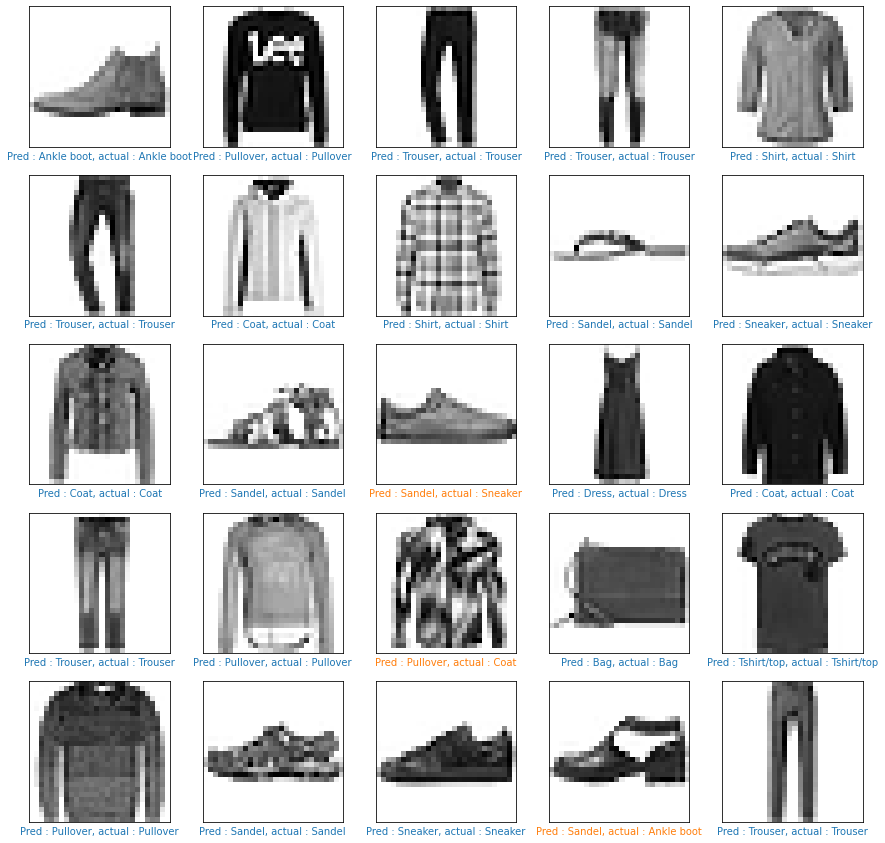

In [82]:
i=0
plt.figure(figsize=(15,15))
for idx,image in enumerate(x_test[:25]):
  y_pred = model.predict_proba(image.reshape((1,28,28)))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image,cmap=plt.cm.binary)
  actual_lable,pred_lable=class_names[y_test[idx]],class_names[np.argmax(y_pred)]
  color = 'C0' if actual_lable == pred_lable else 'C1'
  plt.xlabel('Pred : {}, actual : {}'.format(pred_lable,actual_lable),color=color)
  i += 1
plt.show()

In [ ]:
|